# Метеостанции


* Ура-Губа  22018  69° 17' с.ш., 32° 48' в.д.; 27 м -- (69.283 с.ш.; 32.80 в.д.)
* Полярный    22019  69° 12' с.ш., 33° 28.823999999999998' в.д.; 13 м -- (69.20 с.ш.; 33.48 в.д.)
* Мурманск   22113  68° 57' с.ш., 33° 06' в.д.; 57 м -- (69.95 с.ш.; 33.10 в.д.)
* Мурманск (аэропорт)  ULMM  68° 47.028000000000006' с.ш., 32° 45.354' в.д.; 48 м -- (69.783 с.ш.; 32.75 в.д.)
* Териберка  22028    69° 12' с.ш., 35° 07' в.д.; 29 м -- (69.20 с.ш.; 35.12 в.д.)
* Вайда-Губа  22003  69° 56' с.ш., 31° 59' в.д.; 8 м -- (69.93 с.ш.; 31.98 в.д.)
* Вадсё  01088  70° 04' с.ш., 29° 51' в.д.; 39 м -- (70.07 с.ш.; 29.56 в.д.)
* Вардё  01099   70° 21.318' с.ш., 31° 2.6999999999999997' в.д.; 13 м -- (70.35 с.ш.; 31.05 в.д.)
* Киркенес  ENKR  69° 44' с.ш., 29° 54' в.д.; 91 м -- (69.73 с.ш.; 29.90 в.д.)
* Маккаур  01092  70° 42' с.ш., 30° 04' в.д.; 9 м -- (70.70 с.ш.; 30.07 в.д.)

In [2]:
import os
import numpy as np
from netCDF4 import Dataset

from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

Рассмотрим границы охвата сеток реанализа

## cfs2

In [3]:
file_path = '//10.9.14.114/calc/Nikitin/novatek/rean/cfs2/wind_ura_2019-03-01.nc'
netcdf_file = Dataset(file_path)

lon_vector = np.array(netcdf_file.variables['lon'])
lat_vector = np.array(netcdf_file.variables['lat'])

print(f'"Левый нижний" угол: широта - {np.min(lat_vector)}, долгота - {np.min(lon_vector)}')
print(f'"Правый верхний" угол: широта - {np.max(lat_vector)}, долгота - {np.max(lon_vector)}')

scope_lat = np.max(lat_vector) - np.min(lat_vector)
scope_lon = np.max(lon_vector) - np.min(lon_vector)

print(f'Размах по широте - {scope_lat}')
print(f'Размах по долготе - {scope_lon} \n')

"Левый нижний" угол: широта - -89.84351351786847, долгота - 0.0
"Правый верхний" угол: широта - 89.84351351786847, долгота - 359.79545454545456
Размах по широте - 179.68702703573695
Размах по долготе - 359.79545454545456 



## era5

In [15]:
file_path = '//10.9.14.114/calc/Nikitin/novatek/rean/era5/wind_ura_2019-03-01.nc'
netcdf_file = Dataset(file_path)

lon_vector = np.array(netcdf_file.variables['longitude'])
lat_vector = np.array(netcdf_file.variables['latitude'])

print(f'"Левый нижний" угол: широта - {np.min(lat_vector)}, долгота - {np.min(lon_vector)}')
print(f'"Правый верхний" угол: широта - {np.max(lat_vector)}, долгота - {np.max(lon_vector)}')

scope_lat = np.max(lat_vector) - np.min(lat_vector)
scope_lon = np.max(lon_vector) - np.min(lon_vector)

print(f'Размах по широте - {scope_lat}')
print(f'Размах по долготе - {scope_lon} \n')

"Левый нижний" угол: широта - 65.81600189208984, долгота - 31.207000732421875
"Правый верхний" угол: широта - 72.81600189208984, долгота - 34.70800018310547
Размах по широте - 7.0
Размах по долготе - 3.5009994506835938 



Сопоставление границ моделируемой области и расположения метеостанций.

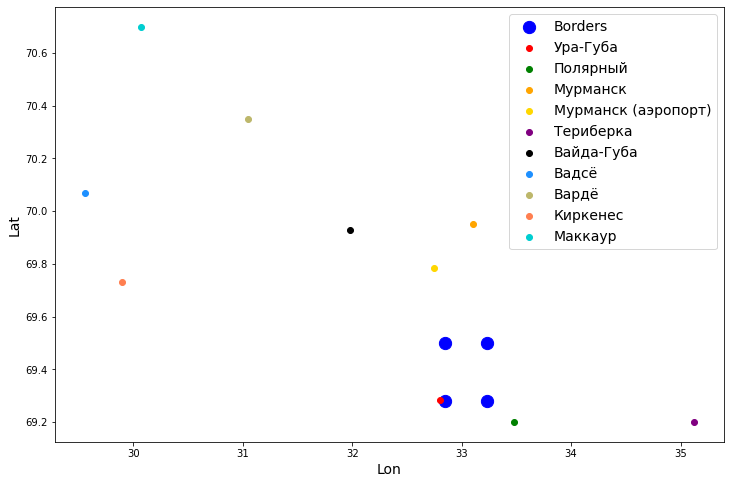

In [24]:
lat_borders = [69.28, 69.28, 69.5, 69.5]
lon_borders = [32.8496, 33.2303, 32.8496, 33.2303]

plt.scatter(lon_borders, lat_borders, c='blue', label='Borders', s=150)
plt.scatter(32.80, 69.283, c='red', label='Ура-Губа')
plt.scatter(33.48, 69.20, c='green', label='Полярный')
plt.scatter(33.10, 69.95, c='orange', label='Мурманск')
plt.scatter(32.75, 69.783, c='#FFD700', label='Мурманск (аэропорт)')
plt.scatter(35.12, 69.20, c='purple', label='Териберка')
plt.scatter(31.98, 69.93, c='black', label='Вайда-Губа')
plt.scatter(29.56, 70.07, c='#1E90FF', label='Вадсё')
plt.scatter(31.05, 70.35, c='#BDB76B', label='Вардё')
plt.scatter(29.90, 69.73, c='#FF7F50', label='Киркенес')
plt.scatter(30.07, 70.70, c='#00CED1', label='Маккаур')
plt.legend(fontsize=14)
plt.xlabel('Lon', fontsize=14)
plt.ylabel('Lat', fontsize=14)
plt.show()

Таким образом, наиболее близки к расположению моделируемой области метеостанции "Ура-Губа" и "Полярный"